# Stroke Prediction Analysis

## Introduction
Stroke is the second leading cause of death globally, accounting for approximately 11% of total deaths, according to the World Health Organization (WHO). Given the significant impact of stroke on public health, early detection and intervention are crucial in reducing morbidity and mortality associated with this condition. This project aims to analyze a dataset that contains various clinical features to predict the likelihood of stroke occurrence in patients.

The dataset comprises 11 clinical attributes, including demographic information, medical history, and lifestyle factors, such as gender, age, hypertension, heart disease, and smoking status. By utilizing machine learning techniques, we aim to develop predictive models that can effectively identify individuals at high risk for stroke. Understanding these risk factors will facilitate timely interventions and promote better health outcomes.

Through exploratory data analysis (EDA) and predictive modeling, this project seeks to uncover valuable insights into the determinants of stroke risk, contributing to improved prevention strategies and healthcare policies.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Data Preparation](#data-visualization)
5. [Correlation Analysis](#correlation-analysis)
6. [Modeling](#modeling)
7. [Model Evaluation](#model-evaluation)
8. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [539]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

The following libraries are missing: scikit-learn
Starting installation...
Installing scikit-learn...
scikit-learn installed successfully.
Error: scikit-learn was not installed correctly.
Some libraries were not installed correctly.


## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [541]:
# Paths to the CSV files
path_data = '../data/healthcare-dataset-stroke-data.csv'

# Reading the CSV files
df = pd.read_csv(path_data)

In [542]:
# Display the first few rows of the dataset along with additional information
print("Stroke Data:")
print(df.head())  # Display the first few rows

# Display dataset information
print("\nDataset Information:")
print(df.info())  # Display information about the dataset

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())  # Display descriptive statistics for numerical columns

# Display the count of missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())  # Count of missing values in each column

# Display the column names
print("\nColumn Names:")
print(df.columns.tolist())  # List of column names

Stroke Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dataset Information:
<class 'pandas.core.f

In [543]:
# Check for duplicate values in the 'id' column
# duplicated() returns a boolean Series indicating if each row is a duplicate
# any() checks if there are any True values in the Series
has_duplicates = df['id'].duplicated().any()

# If there are no duplicates, we assume this column is an ID column
if not has_duplicates:
    print("The 'id' column has no duplicates. Removing it from the DataFrame.")
    # Drop the 'id' column from the DataFrame
    df.drop(columns=['id'], inplace=True)
else:
    print("The 'id' column has duplicates and will not be removed.")

The 'id' column has no duplicates. Removing it from the DataFrame.


In [544]:
# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", df.shape)


Shape of Combined Data: (5110, 11)


## Data Preparation <a name="data-preparation"></a>
Before modeling, we need to prepare the data. This includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

In [545]:
# Check the data types of each column in the DataFrame
print("Data Types of Each Column:")
print(df.dtypes)

# For a more organized view, you can use the .info() method
print("\nDetailed Information about the DataFrame:")
print(df.info())

Data Types of Each Column:
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Detailed Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi  

In [546]:
# Normalize the 'gender' column by stripping whitespace and converting to lowercase
df['gender'] = df['gender'].str.strip().str.lower()

# Remove the observation 'other' from the 'gender' column (now in lowercase)
df = df[df['gender'] != 'other']

# Check the count of unique values after removal
print("\nUnique Values in 'gender' after removal:")
print(df['gender'].value_counts())


Unique Values in 'gender' after removal:
gender
female    2994
male      2115
Name: count, dtype: int64


In [547]:
# Convert columns to numeric types (if applicable)
df['avg_glucose_level'] = pd.to_numeric(df['avg_glucose_level'], errors='coerce')

# Convert categorical columns
df['gender'] = df['gender'].astype('category')
df['ever_married'] = df['ever_married'].astype('category')
df['work_type'] = df['work_type'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')

# Identify and remove observations with missing values in 'stroke' or other critical columns
df = df.dropna(subset=['stroke', 'avg_glucose_level'])

# Check the data types after conversion
print("Data Types after Conversion:")
print(df.dtypes)

# Check the amount of missing values in the columns
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Data Types after Conversion:
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

Missing Values in Each Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [548]:
# Calculate the correlation between 'stroke' and 'bmi' (There are 201 missing values)
correlation = df['stroke'].corr(df['bmi'])
print(f"Correlation between stroke and BMI: {correlation:.2f}")

Correlation between stroke and BMI: 0.04


In [549]:
# Decision to Remove BMI Variable from the DataFrame

# After conducting a correlation analysis, it was observed that the correlation coefficient between 
# the Body Mass Index (BMI) and the stroke occurrence is merely 0.04. This indicates a very weak 
# relationship between these two variables, suggesting that BMI does not significantly influence 
# the likelihood of having a stroke in our dataset.

# Given this lack of relevant correlation, we have decided to remove the BMI variable from the 
# DataFrame. This will streamline our model and focus on more significant predictors of stroke 
# occurrence, thereby enhancing the overall performance and interpretability of our predictive model.

# Removing the BMI variable
df.drop(columns=['bmi'], inplace=True)

# Displaying the updated DataFrame columns
print("Updated DataFrame columns after removing BMI:")
print(df.columns.tolist())

Updated DataFrame columns after removing BMI:
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 'stroke']


In [550]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                age  hypertension  heart_disease  avg_glucose_level  \
count  5109.000000   5109.000000    5109.000000        5109.000000   
mean     43.229986      0.097475       0.054022         106.140399   
std      22.613575      0.296633       0.226084          45.285004   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.240000   
50%      45.000000      0.000000       0.000000          91.880000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

            stroke  
count  5109.000000  
mean      0.048738  
std       0.215340  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [551]:
# Check unique values in categorical columns
for column in df.select_dtypes(include=['category']).columns:  
    print(f"\nUnique Values in '{column}':\n", df[column].value_counts())


Unique Values in 'gender':
 gender
female    2994
male      2115
Name: count, dtype: int64

Unique Values in 'ever_married':
 ever_married
Yes    3353
No     1756
Name: count, dtype: int64

Unique Values in 'work_type':
 work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Unique Values in 'Residence_type':
 Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

Unique Values in 'smoking_status':
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


## Correlation Analysis <a name="correlation-analysis"></a>
We will analyze the correlations between features in the dataset. This will help us identify which factors are most strongly related to stroke.


In [552]:
# Normalize the 'gender' column and convert other categorical columns
df['gender'] = df['gender'].str.strip().str.lower()
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['hypertension'] = df['hypertension'].astype(int)
df['heart_disease'] = df['heart_disease'].astype(int)

In [553]:
# Apply One-Hot Encoding for other categorical variables
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [554]:
# Check DataFrame columns after transformation
print("Colunas do DataFrame após a codificação:")
print(df.columns.tolist())


Colunas do DataFrame após a codificação:
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'stroke', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [555]:
# List of features to include in the correlation matrix
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 
            'stroke'] + [col for col in df.columns if col.startswith(('work_type_', 'Residence_type_', 'smoking_status_'))]

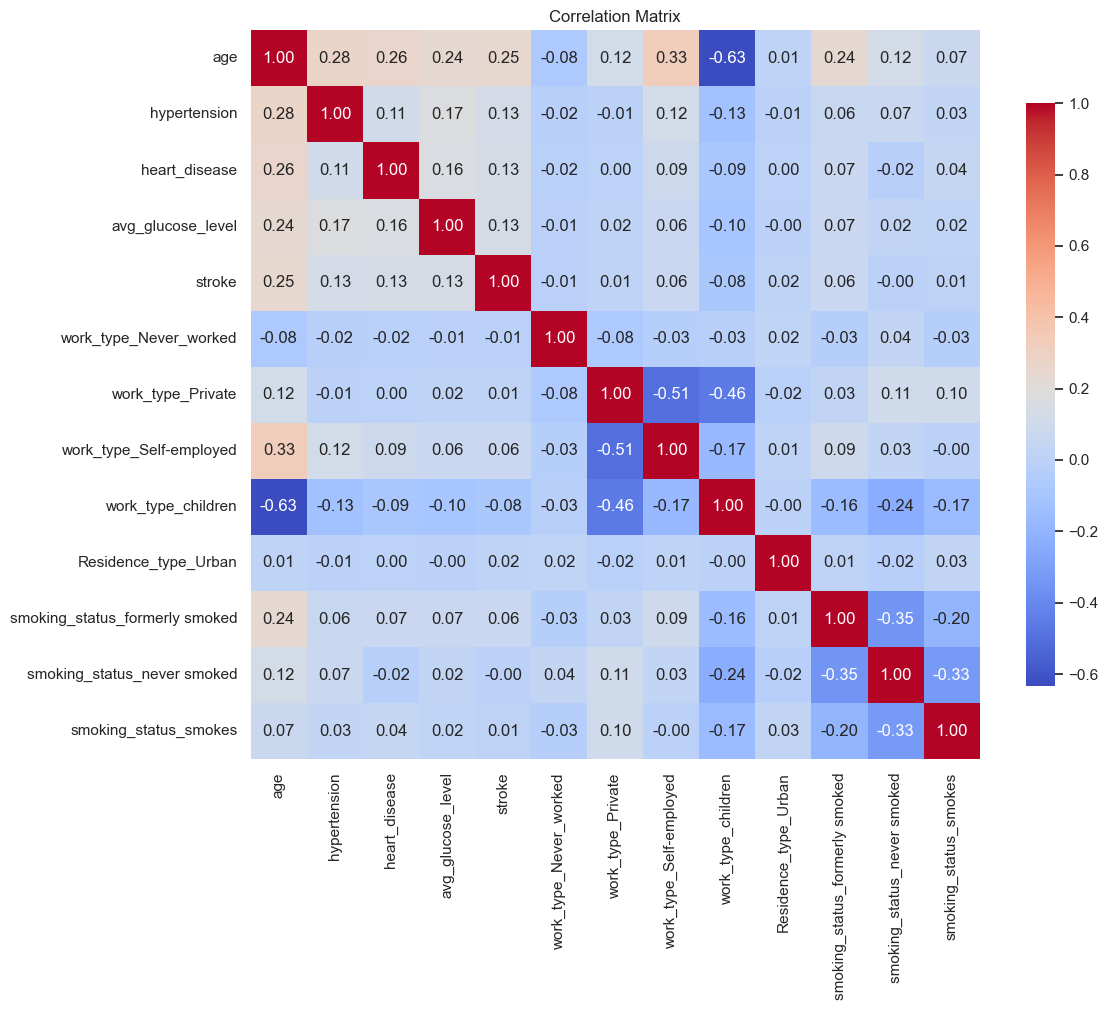

In [556]:
# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure for the correlation heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title and labels
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

## Modeling <a name="modeling"></a>
In this section, we will build machine learning models to predict students' academic performance based on their alcohol consumption and other features. We will choose appropriate algorithms and fit them to our training data.

In [557]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the encoder to the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# Check the data types after conversion
print("Data Types after gender encoding:")
print(df.dtypes)

Data Types after gender encoding:
gender                               int32
age                                float64
hypertension                         int32
heart_disease                        int32
ever_married                      category
avg_glucose_level                  float64
stroke                               int64
work_type_Never_worked                bool
work_type_Private                     bool
work_type_Self-employed               bool
work_type_children                    bool
Residence_type_Urban                  bool
smoking_status_formerly smoked        bool
smoking_status_never smoked           bool
smoking_status_smokes                 bool
dtype: object


In [558]:
# Prepare the data
# Define the features (X) and the target variable (y)
# X contains all the independent variables (features) used to predict stroke
# y contains the dependent variable (target) which is stroke
X = df.drop(columns=['stroke'])  # Drop the target variable from the DataFrame
y = df['stroke']  # Target variable

In [559]:
# Split the data into training and testing sets
# Here we use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [560]:
# Initialize the Random Forest Classifier
# Random Forest is an ensemble learning method that is effective for classification tasks
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [561]:
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [562]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [563]:
# Evaluate the model
# Print confusion matrix to see the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[956   4]
 [ 60   2]]


In [564]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022



## Model Evaluation <a name="model-evaluation"></a>
After building our models, we will evaluate their performance using various metrics. We will compare the predictions against the actual outcomes to determine how well our models are performing.

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.